# `pegaplot` : A custom plotting API for myself
--------------

## **5줄 요약**
* **Paper-level Plot Generation with 1 Line, 3 Paramameters**
* `matplotlib`과 `seaborn`기반 custom plotting API.  
* 한글 출력, custom labeling, 주요 데이터 추출 및 삽입 가능.  
* bar, pie, donut, (`DataFrame`간 비교 포함) distribution, scatter plot 가능.
* 자유도를 희생하고 효율성을 취함: 그래프를 **찍어내기**위한 API입니다.
--------------------

### Table of Contents ###
[0. 개발 동기]()  
[1. 설치 방법]()  
[2. 사용 방법]()  
[- 2.1. import pegaplot as pp]()  
[- 2.2. 예제 데이터 읽기]()  
[- 2.3. df2md()]()  
[- 2.4. bar()]()  
[--- 2.4.1. bar(DataFrame, column): 기본 사용법]()  
[--- 2.4.2. xcols: 복수 column 분석]()  
[--- 2.4.3. rols: 제약변수]()  
[--- 2.4.4. labels: Custom Labels]()  
[--- 2.4.5. gap: Data value 출력]()  
  

## 0. 개발 동기
1. 동일 데이터로 장시간 반복작업을 하다 보니 그래프의 통일성이 훼손됩니다.
  * 학회 발표, 논문 작성시마다 재작업이 필요했습니다.    
2. `matplotlib` 용법을 찾기 위한 구글링을 포함해 유사 반복 작업이 많습니다.  
  * 업무 효율성이 떨어지고 있었습니다.  
3. 최대한 군더더기를 제외하고 필요한 기능만 남긴 함수로 만들어 사용했습니다.  
  * 유사한 코드가 많아지다 보니 백업, 버전관리가 절실했습니다.  
4. `github`을 통해 타인으로부터 받은 피드백이 유용한 경험이 있습니다.  
  * 이를 재현하고자 합니다.  

## 1. 설치 방법
1. 본인이 관리하기 편한 곳에 디렉토리를 만듭니다.  
2. 새로 만든 디렉토리에 `pegaplot.py`를 [다운로드](https://github.com/jehyunlee/code-snippet/blob/master/0_work-snippet/pegaplot/pegaplot.py) 받습니다.
3. 운영체제에 따라 아래와 같은 방법으로 `python import` 환경을 설정합니다.  

### 1.1. Windows
1. `환경 변수 설정`에서 `PYTHONPATH`를 [링크](https://sshkim.tistory.com/158)를 참고하여 설정합니다.
2. `명령 프롬프트`에서 `set`을 입력하여 설정을 활성화합니다.

### 1.2. Linux
* `.bashrc`에 `PYTHONPATH`를 [링크](https://stackoverflow.com/questions/3402168/permanently-add-a-directory-to-pythonpath)와 같이 설정해 줍니다.  
* `source .bashrc`로 설정을 활성화합니다.  

## 2. 사용 방법

### 2.1. `import pegaplot`으로 불러옵니다.
* 그래프에 한글 표현이 가능해집니다. Font는 나눔고딕입니다.  
* `seaborn`기반으로 기본 환경이 설정됩니다: `whitegrid`, `muted`, `talk`
* 작업하시는 위치에 `images` 폴더가 있는지 확인하고 없으면 만들어줍니다. 그림들이 저장될 곳입니다.  
* 추가 작업을 안하신다면 `matplotlib`이나 `seaborn`을 따로 부를 필요가 없습니다.

In [ ]:
import pegaplot as pp

### 2.2. 그림을 그릴 데이터 파일을 불러옵니다.

#### 2.2.1. Categorical Data: Kaggle Titanic dataset
* `kaggle`의 `titanic` `test set` 데이터를 이용하겠습니다. ([다운로드](https://github.com/jehyunlee/code-snippet/blob/master/0_work-snippet/data_sample/titanic_train.csv))
* 편의상 작업 디렉토리에 `data`를 만들고 거기에 복사해 두었습니다.
* 데이터를 불러오기 위해 `pandas`를 `import`합니다.

In [ ]:
import pandas as pd

datafile = "./data/titanic_train.csv"
dft = pd.read_csv(datafile)

#### 2.2.2. Numerical Data: Scikit-learn Boston House Price
* `scikit-learn`의 `boston house price` 데이터를 이용하겠습니다. 
* 데이터를 불러오기 위해 `scikit-learn`을 `import`합니다.

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
dfb = pd.concat([dfX, dfy], axis=1)

### 2.3. `df2md()` : `DataFrame`을 `Markdown`으로 변환해서 출력

* `DataFrame`을 깔끔하게 출력하기 위해 `pegaplot`의 `df2md`를 `import`합니다.  
  `import pegaplot as pp`에서 `pp.df2md()`로 사용 가능하지만,  
  자주 쓰는 명령인 만큼 일일이 앞에 `pp.`를 붙이는 번거로움을 없애기 위해서입니다.
* `DataFrame`을 `Markdown`으로 출력해주는 명령입니다.  
* 웹 환경에서의 가독성을 향상시키는 효과가 있습니다.

In [ ]:
from pegaplot import df2md

df2md(dft.head())

* `Name`과 `Ticket`의 내용을 짧게 출력하고 싶습니다.
* `df2md()`의 `maxlen` 옵션을 이용해봅시다. 내용이 긴 cell을 짧게 줄여주는 옵션입니다.

In [ ]:
df2md(dft.head(), maxlen=3)

* `index`를 기본적으로 **(index)** 로 보여주는데, **[idx]**로 바꿔봅시다.

In [ ]:
df2md(dft.head(), maxlen=3, indexname="[idx]")

### 2.4. `bar()` : Categorical Data 개수 비교

#### 2.4.1. bar(DataFrame, column): 기본 사용법
* `seaborn`의 `barplot`을 기본으로 동작하는 데이터 수 그래프입니다.
* 기본적으로 두 개의 변수로 작동합니다. 
* `DataFrame`이름, 숫자를 셀 `column`이름 입니다.

* 생존자와 사망자 수를 세어보도록 하겠습니다.
* 파일명은 `cat_bar_{DataFrame}_{column}.png`이므로, `cat_bar_dft_Survived.png`입니다.

In [ ]:
pp.bar(dft, "Survived")

#### 2.4.2. xcols: 복수 column 분석
* `pegaplot`은 그래프를 여러 장 찍어내기 위한 API입니다.  
  `column` 자리에 `list`를 넣어도 동작합니다. 
* 이 때 그림들은 각각의 파일로 저장됩니다.  

In [ ]:
pp.bar(dft, ["Survived", "Pclass", "SibSp"])

#### 2.4.3. rcols: 제약변수
* 이번에는 `Pclass`별 `Survivor`를 구해보겠습니다.
* 제약변수(`restrictor`)를 추가하면 됩니다.
* 제약변수도 `list`형태로 입력할 수 있습니다.
* 파일명은 `cat_bar_{DataFrame}_{column}_{restrictor}{value}.png`입니다.

In [ ]:
pp.bar(dft, "Survived", ["Pclass", "Sex"])

#### 2.4.4. labels: Custom Labels
* `labels` 옵션을 이용해서 변수명 대신 이름을 출력할 수 있습니다.
* `dict` type으로, `{변수명:레이블}` 구조를 받습니다.

In [ ]:
dft.columns

In [ ]:
cols = dft.columns
labels_kr = [
    "승객ID",
    "생존여부",
    "객실등급",
    "이름",
    "성별",
    "나이",
    "형제배우자 수",
    "부모자식 수",
    "티켓 번호",
    "요금",
    "객실 번호",
    "출발지",
]
labelt = dict(zip(cols, labels_kr))
print(labelt)

In [ ]:
pp.bar(dft, "Survived", "Pclass", labels=labelt)

#### 2.4.5. gap: Data value 출력
* bar graph 상단의 숫자 위치를 조정할 수 있습니다.
* data의 위치는 가장 큰 데이터의 높이를 기준으로 상대적으로 결정됩니다.
* 기본값은 3 % (gap = 0.03)이며, 음수와 제거(gap=`None`)도 가능합니다.

In [ ]:
pp.bar(dft, "SibSp", gap=0.02, labels=labelt)

In [ ]:
pp.bar(dft, "SibSp", gap=-0.1)

In [ ]:
pp.bar(dft, "SibSp", gap=None)

### 2.5. `pie()` : Categorical Data 개수 비교

#### 2.5.1. bar(DataFrame, column): 기본 사용법
* `matplotlib`의 `pie`를 기본으로 동작하는 데이터 수 그래프입니다.
* 기본적으로 두 개의 변수로 작동합니다. 
* `DataFrame`이름, 숫자를 셀 `column`이름 입니다.

In [ ]:
pp.pie(dft, "Pclass")

#### 2.5.2. xcols, rcols: 복수 column, 복수 제약변수
* `bar()`와 마찬가지로 `xcols`와 `rcols`에 여러 개의 변수를 넣을 수 있습니다.

In [ ]:
pp.pie(dft, ["Survived", "SibSp"], ["Pclass"])

#### 2.5.3. labels: Custom Labels
* `bar()`와 마찬가지로 `dict` type의 custom label을 넣을 수 있습니다.

In [ ]:
pp.pie(dft, "Pclass", "Survived", labels=labelt)

#### 2.5.4. cmap: color map
* pie chart의 배색을 변경할 수 있습니다.
* `matplotlib`의 [`colormap`](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)을 사용합니다.
* 기본값은 `'tab20'`입니다.

In [ ]:
pp.pie(dft, "Pclass", labels=labelt, cmap="Accent")

#### 2.5.5. startangle: pie chart 회전
* pie chart의 각도를 변경할 수 있습니다.
* `startangle`에 `degree` 단위로 각도를 넣으면 됩니다.

In [ ]:
pp.pie(dft, "Pclass", cmap="Set1", startangle=-45)

#### 2.5.6. annotate: Data Value On/OFF
* pie chart 위에 표기되는 숫자를 끌 수 있습니다.  
* 숫자를 끄면, 데이터가 별도의 표로 표기됩니다. 
* `labels` 옵션과 함께 사용하면 표의 변수명까지 바꾸어 보실 수 있습니다.

In [ ]:
pp.pie(dft, "SibSp", labels=labelt, annotate=False)

#### 2.5.7. legend: 범례 On/OFF
* pie chart 우측의 범례를 끌 수 있습니다.
* 이 때 변수 이름은 pie chart 중앙에 위치합니다.
* `legend=False` 입력시 나오는 오류메시지는 무시하셔도 좋습니다.

In [ ]:
pp.pie(dft, "Sex", "Survived", labels=labelt, legend=False)

### 2.6. `donut()` : Categorical Data 개수 비교

#### 2.6.1. donut(DataFrame, column): 기본 사용법
* `pie`와 같이 `matplotlib`의 `pie`를 기본으로 동작하는 데이터 수 그래프입니다.
* 기본적으로 두 개의 변수로 작동합니다. 
* `DataFrame`이름, 숫자를 셀 `column`이름 입니다.

In [ ]:
pp.donut(dft, "Pclass")

#### 2.6.2. xcols, rcols: 복수 column, 복수 제약변수
* `pegaplot`은 그래프를 여러 장 찍어내기 위한 API입니다.  
* `bar()`와 마찬가지로 `xcols`와 `rcols`에 여러 개의 변수를 넣을 수 있습니다.

In [ ]:
pp.donut(dft, ["Survived", "Pclass"], ["SibSp", "Sex"])

#### 2.6.3. labels: Custom Labels
* `bar()`, `pie()`와 마찬가지로 `dict` type의 custom label을 넣을 수 있습니다.

In [ ]:
pp.donut(dft, ["Survived", "Pclass", "SibSp"], labels=labelt)

#### 2.7.4. cmap: color map
* `donut` chart의 배색을 변경할 수 있습니다.
* `matplotlib`의 `colormap`을 사용합니다.
* 기본값은 `'tab20'`입니다.

In [ ]:
pp.donut(dft, "Pclass", labels=labelt, cmap="rainbow")

#### 2.8.4. startangle: donut chart 회전
* 위 그림을 보면 `label`이 `title`을 가리고 있습니다.
* 이런 경우에 `startangle`을 조정할 수 있습니다.

In [ ]:
pp.donut(dft, "Pclass", labels=labelt, cmap="rainbow", startangle=-60)

#### 2.8.5. annotate: 꼬리표 On/Off
* `annotation`을 원치 않는 경우 `False`로 설정하여 제거할 수 있습니다.
* 데이터 값은 별도의 표로 출력됩니다.

In [ ]:
pp.donut(dft, "Pclass", annotate=False)

#### 2.8.6. legend: 범례 On/Off
* `pie` chart와 같이 `legend`로 표시할 수 있습니다.
* 이 때 그림 중앙에 있던 변수 이름은 `legend`로 이동합니다.

In [ ]:
pp.donut(dft, "SibSp", labels=labelt, annotate=False, legend=True)

### 2.7. `dist()` : Numerical Data Distribution

#### 2.7.1. Numerical Data Preparation
* 앞서 불러둔 보스턴 집값 데이터를 대상으로 `custom label (labelb)`을 작성하고,
* `pegaplot` 기능 시연을 위해 `numerical`데이터 일부를 `categorical`로 변경합니다.

In [ ]:
df2md(dfb.head())

In [ ]:
dfb.columns

In [ ]:
cols = dfb.columns
labels_kr = [
    "범죄율",
    "25k ft2 초과\n거주지역 비율",
    "비상업 면적비율",
    "찰스강 근교 여부",
    "일산화질소 농도",
    "평균 방 수",
    "1940년 이전\n주택 비율",
    "직업센터까지 거리",
    "고속도로까지 거리",
    "재산세율",
    "학생 교사 비율",
    "흑인 비율",
    "하위 계층 비율",
    "주택 가격 (중앙값)",
]
labelb = dict(zip(cols, labels_kr))
print(labelb)

#### 2.7.2. dist(DataFrame, columns): 기본 사용법
* `seaborn`의 `distplot`을 기본으로 동작하는 데이터 분포 그래프입니다.
* 기본적으로 두 개의 변수로 작동합니다. 
* `DataFrame`이름, 분포를 확인할 `columns`이름 입니다.
* 그래프 외에도 평균, 표준편차, 최소, 최대값이 `text`로 출력됩니다.

In [ ]:
pp.dist(dfb, "RM")

#### 2.7.3. xcols, rcols: 복수 column, 복수 제약변수
* 앞의 그래프들과 같이 복수의 `rcols`에 대해 복수의 `xcols`를 그릴 수 있습니다.
* `CHAS(찰스 강 근교 여부)`에 따른 `RM(평균 방 수)`를 그려봅니다.

In [ ]:
pp.dist(dfb, "RM", "CHAS")

* 시연을 하기에 `categorical` 변수 갯수가 부족하므로 `CHAS(찰스강 근교 여부)`에 이어 `RM(평균 방 수)`를 `categorical`로 변환합니다.
* `seaborn`기본 그래프와의 비교를 위해 `seaborn`으로 구현한 결과를 보면 사소한 변화를 감지할 수 있습니다.

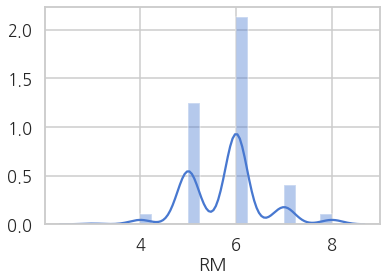

In [7]:
import numpy as np


def floor(x):
    return np.floor(x)


dfb["RM"] = dfb["RM"].apply(floor)
sns.distplot(dfb["RM"])

* `RM(평균 방 수)`가 

버전:  3.1.1
설치 위치:  /opt/conda/lib/python3.7/site-packages/matplotlib/__init__.py
설정 위치:  /root/.config/matplotlib
캐시 위치:  /root/.cache/matplotlib
설정 파일 위치:  /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
NanumGothic
# matplotlib 한글 사용 가능
# Seaborn Figure Style : whitegrid, muted, talk
# Available Functions : df2md(), bar(), pie(), donut(), dist(), dists(), scatter()
{'CRIM': '범죄율', 'ZN': '비상업 면적비율', 'INDUS': '일산화질소 농도', 'CHAS': '평균 방 수', 'NOX': '하위 계층 비율', 'RM': '흑인 비율', 'AGE': '학생 교사 비율', 'DIS': '25k ft2 초과\n거주지역 비율', 'RAD': '찰스강 근교 여부', 'TAX': '1940년 이전\n주택 비율', 'PTRATIO': '고속도로까지 거리', 'B': '직업센터까지 거리', 'LSTAT': '재산세율', 'MEDV': '주택 가격 (중앙값)'}


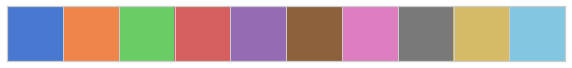

In [1]:
# test cell
import pegaplot as pp
import pandas as pd
from pegaplot import df2md

from sklearn.datasets import load_boston

boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
dfb = pd.concat([dfX, dfy], axis=1)

cols = dfb.columns
labels_kr = [
    "범죄율",
    "비상업 면적비율",
    "일산화질소 농도",
    "평균 방 수",
    "하위 계층 비율",
    "흑인 비율",
    "학생 교사 비율",
    "25k ft2 초과\n거주지역 비율",
    "찰스강 근교 여부",
    "1940년 이전\n주택 비율",
    "고속도로까지 거리",
    "직업센터까지 거리",
    "재산세율",
    "주택 가격 (중앙값)",
]
labelb = dict(zip(cols, labels_kr))
print(labelb)

return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
raw_cell, store_history, silent, shell_futures)
return runner(coro)
coro.send(None)
interactivity=interactivity, compiler=compiler, result=result)
if (await self.run_code(code, result,  async_=asy)):
exec(code_obj, self.user_global_ns, self.user_ns)
bins=np.arange(0, 10, 0.5)
plt.suptitle(suptitle, fontproperties=fontsuptitle, position=(0.5, 1))
0, RM, CHAS(0.0): mean= 5.76, st.dev.= 0.77, min= 3.00, max= 8.00
0, RM, CHAS(1.0): mean= 5.97, st.dev.= 0.86, min= 5.00, max= 8.00


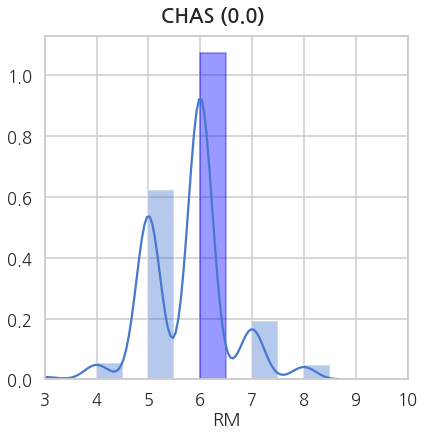

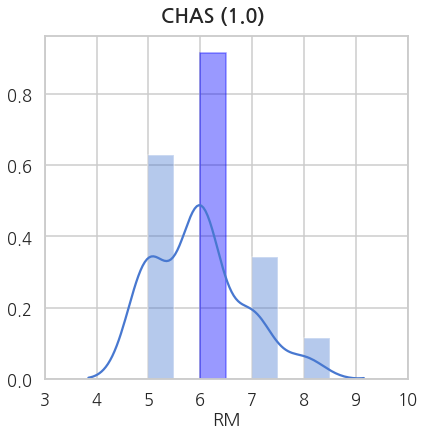

In [25]:
pp.dist(
    dfb, "RM", "CHAS", xlims=[3, 10], kde=True, norm_hist=True, maxbar=True, rsep=True,
    bins=np.arange(0, 10, 0.5)
)

In [20]:
import seaborn as sns

In [ ]:
sns.distplot()

In [ ]:
# test cell
import pegaplot as pp
import pandas as pd
from pegaplot import df2md

datafile = "./data/titanic_train.csv"
dft = pd.read_csv(datafile)

pp.bar(dft, "Survived")

In [ ]:
text = "pp.donut(   df = dft   , 'Pclass', 'Survive')"

In [ ]:
begin = text.find("(") + 1
end = text.find(",", begin)
ans = text[begin:end].strip(" ")
if "=" in ans:
    ans = ans.split("=")[1]
print(ans)

In [ ]:
import matplotlib.pyplot as plt

plt.style.context("seaborn")